# Convolutional neural networks

In class, we have briefly reviewed the idea of learning good features directly from data and went through the concept of convolutional neural networks along with few architectures.

Until recently, building convolutional neural networks was tough. There was no high-level tools for that, you would be required to understand all the internal mechanics of the model and its operations.

Today, due to the high-level tools such as Keras and TensorFlow, everybody can build a convolutional neural network and put it to work without diving deep into them. What used to be a one-month project became a few hours exercise.


In [0]:
import numpy as np
import keras
import pickle
import matplotlib.pyplot as plt


## Loading the images

In [0]:
train_images, train_labels = pickle.load(open('data/train_set_all.pkl', 'rb'))
cv_images, cv_labels = pickle.load(open('data/test_set_all.pkl', 'rb'))

In [29]:
print(train_images.shape)
print(len(train_labels))

(50000, 32, 32, 3)
50000


In [30]:
print(cv_images.shape)
print(len(cv_labels))

(10000, 32, 32, 3)
10000


In [31]:
print(train_labels[0:10])

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]


In [0]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array)

In [0]:
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

Label:  6
(50000, 32, 32, 3)


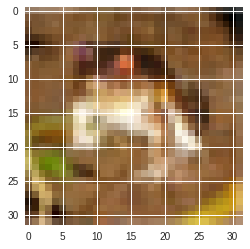

In [34]:
show_example(train_images, train_labels, example_index = 0)
print(train_images.shape)

Label:  3


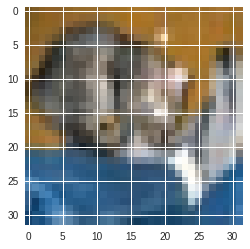

In [35]:
show_example(cv_images, cv_labels, example_index = 0)

## Building AlexNet

In 2012 a convolutional neural network called AlexNet won ImageNet competition. 

Go through an [original AlexNet paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) to investigate the architecture. Next, investigate the [basics of Keras](https://keras.io/#keras-the-python-deep-learning-library). We will use it with TensorFlow backend.

You are also encouraged to go through some CNN tutorial for Keras. There is a number of them online (for example, [this](https://elitedatascience.com/keras-tutorial-deep-learning-in-python) or [this](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/)).
Now, build AlexNex network with Keras for object recognition. Note that standard AlexNet works with 224x224 input images. The dataset you are going to use for this problem is 32x32.

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import numpy as np



In [37]:
np.random.seed(15)
train_labels = np_utils.to_categorical(train_labels, 10)
cv_labels = np_utils.to_categorical(cv_labels, 10)
print(train_labels.shape, cv_labels.shape)

(50000, 10) (10000, 10)


In [0]:
train_images = train_images.astype('float32')
cv_images = cv_images.astype('float32')
train_images /= 255
cv_images /= 255

In [59]:

# Original Alex Net
# Everything is same as in the original architecture except items listed below
# I changed first Conv layer filter receptive field from 11 x 11 to 3 x 3
# Also I use BatchNormalization instead of Local
# Didn't use Dropouts here

model = Sequential()
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 7, 7, 96)          384       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 256)         614656    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 3, 384)         885120    
__________

In [0]:

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Training AlexNet

Use training set for training the network to recognize objects. You might want to use RMSProp optimizer to speed up the training.

Convolutional networks require a lot of computing power for training. Typical setup for training CNN is to use GPU, however, in this problem you are not required to do so. CPU will be fine as well.

If you are using CPU for this subproblem, training process might be slow. You can stop it manually as soon as you get meaningful results.

Report the results on the training and cross-validation sets. The report should contain the training logs.

In [63]:
# save weights that improve validation accuracy
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# training AlexNet
epochs = 100
batch_size = 128

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(cv_images, cv_labels),
          callbacks=callbacks_list,
          shuffle=True)



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 620us/step - loss: 0.8706 - acc: 0.6932 - val_loss: 1.0564 - val_acc: 0.6388

Epoch 00001: val_acc improved from -inf to 0.63880, saving model to weights.best.hdf5
Epoch 2/100
14592/50000 [=======>......................] - ETA: 20s - loss: 0.6344 - acc: 0.777550000/50000 [==============================] - 30s 595us/step - loss: 0.6427 - acc: 0.7739 - val_loss: 0.9562 - val_acc: 0.6877

Epoch 00002: val_acc improved from 0.63880 to 0.68770, saving model to weights.best.hdf5
Epoch 3/100
31104/50000 [=================>............] - ETA: 10s - loss: 0.4456 - acc: 0.843350000/50000 [==============================] - 30s 598us/step - loss: 0.4581 - acc: 0.8383 - val_loss: 1.1383 - val_acc: 0.6560

Epoch 00003: val_acc did not improve
Epoch 4/100
42752/50000 [========================>.....] - ETA: 4s - loss: 0.3238 - acc: 0.885250000/50000 [==============================] - 30s 5

47872/50000 [===========================>..] - ETA: 1s - loss: 0.0478 - acc: 0.984650000/50000 [==============================] - 30s 595us/step - loss: 0.0478 - acc: 0.9847 - val_loss: 2.2757 - val_acc: 0.7019

Epoch 00031: val_acc did not improve
Epoch 32/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0472 - acc: 0.984750000/50000 [==============================] - 30s 596us/step - loss: 0.0478 - acc: 0.9846 - val_loss: 2.1451 - val_acc: 0.7143

Epoch 00032: val_acc did not improve
Epoch 33/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0441 - acc: 0.985950000/50000 [==============================] - 30s 598us/step - loss: 0.0445 - acc: 0.9858 - val_loss: 2.3055 - val_acc: 0.6963

Epoch 00033: val_acc did not improve
Epoch 34/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0454 - acc: 0.984850000/50000 [==============================] - 30s 594us/step - loss: 0.0457 - acc: 0.9848 - val_loss: 2.1121 - val_acc: 0.7178

Ep

47872/50000 [===========================>..] - ETA: 1s - loss: 0.0287 - acc: 0.991750000/50000 [==============================] - 30s 595us/step - loss: 0.0280 - acc: 0.9919 - val_loss: 2.4805 - val_acc: 0.7242

Epoch 00062: val_acc did not improve
Epoch 63/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0302 - acc: 0.991350000/50000 [==============================] - 30s 596us/step - loss: 0.0302 - acc: 0.9913 - val_loss: 2.5966 - val_acc: 0.7256

Epoch 00063: val_acc did not improve
Epoch 64/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0295 - acc: 0.991850000/50000 [==============================] - 30s 596us/step - loss: 0.0298 - acc: 0.9918 - val_loss: 2.3722 - val_acc: 0.7243

Epoch 00064: val_acc did not improve
Epoch 65/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0315 - acc: 0.990850000/50000 [==============================] - 30s 597us/step - loss: 0.0314 - acc: 0.9909 - val_loss: 2.3738 - val_acc: 0.7227

Ep

47872/50000 [===========================>..] - ETA: 1s - loss: 0.0251 - acc: 0.993750000/50000 [==============================] - 30s 597us/step - loss: 0.0252 - acc: 0.9936 - val_loss: 2.3804 - val_acc: 0.7391

Epoch 00093: val_acc did not improve
Epoch 94/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0238 - acc: 0.993750000/50000 [==============================] - 30s 595us/step - loss: 0.0237 - acc: 0.9938 - val_loss: 2.8230 - val_acc: 0.7220

Epoch 00094: val_acc did not improve
Epoch 95/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0288 - acc: 0.993150000/50000 [==============================] - 30s 594us/step - loss: 0.0285 - acc: 0.9932 - val_loss: 2.3530 - val_acc: 0.7374

Epoch 00095: val_acc did not improve
Epoch 96/100
47872/50000 [===========================>..] - ETA: 1s - loss: 0.0247 - acc: 0.994350000/50000 [==============================] - 30s 597us/step - loss: 0.0258 - acc: 0.9940 - val_loss: 2.6087 - val_acc: 0.7288

Ep

In [64]:
scores = model.evaluate(cv_images, cv_labels, verbose=1)
print("cross-validation set accuracy: {}%".format(scores[1]*100))
print("train set accuracy: %.2f%%" % max(history.history['acc']))


10000/10000 [==============================] - 3s 308us/step
cross-validation set accuracy: 72.16%
train set accuracy: 0.99%


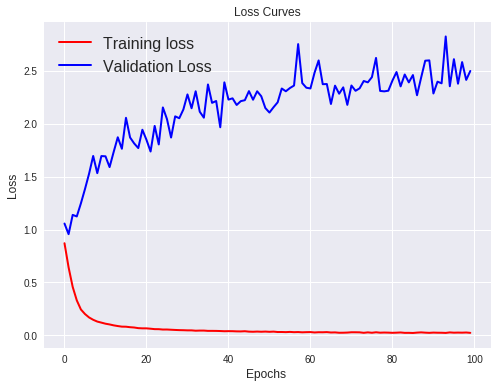

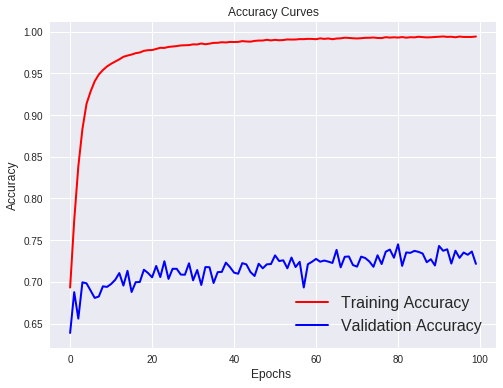

In [65]:
def plot_performance(history):
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=2.0)
    plt.plot(history.history['val_loss'],'b',linewidth=2.0)
    plt.legend(['Training loss', 'Validation Loss'], fontsize=16)
    plt.xlabel('Epochs ', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Loss Curves',fontsize=12)
 
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=2.0)
    plt.plot(history.history['val_acc'],'b',linewidth=2.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=16)
    plt.xlabel('Epochs ',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.title('Accuracy Curves',fontsize=12)

plot_performance(history)

This clearly indicates overfitting. Our model just memorized all training data and is not able to generalize properly.

## Improving AlexNet

As you can see, AlexNet does not work very well on such a small dataset. Recall what you have learned from this class to improve its performance. You can also take a look at the [Dropout technique](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) and its [implementation in Keras](https://keras.io/layers/core/#dropout). 

### First improved model training
In order to reduce overfitting, I firstly try to use Dropouts and changed size of FC layers. 

In [138]:

model = Sequential()
model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', padding='same', input_shape=train_images.shape[1:]))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_156 (Conv2D)          (None, 16, 16, 96)        2688      
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 7, 7, 96)          384       
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 7, 7, 256)         614656    
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
batch_normalization_94 (Batc (None, 3, 3, 256)         1024      
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 3, 3, 384)         885120    
__________

In [71]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# here we memorize weights that improve validation accuracy
filepath="weights_1.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# training 
epochs = 100
batch_size = 128

history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(cv_images, cv_labels),
          callbacks=callbacks_list,
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 22s 448us/step - loss: 1.8233 - acc: 0.3592 - val_loss: 1.3566 - val_acc: 0.5190

Epoch 00001: val_acc improved from -inf to 0.51900, saving model to weights_2.best.hdf5
Epoch 2/100
16512/50000 [========>.....................] - ETA: 13s - loss: 1.3968 - acc: 0.506450000/50000 [==============================] - 21s 428us/step - loss: 1.3159 - acc: 0.5375 - val_loss: 1.1223 - val_acc: 0.6009

Epoch 00002: val_acc improved from 0.51900 to 0.60090, saving model to weights_2.best.hdf5
Epoch 3/100
34816/50000 [===================>..........] - ETA: 6s - loss: 1.1111 - acc: 0.618950000/50000 [==============================] - 21s 427us/step - loss: 1.0918 - acc: 0.6240 - val_loss: 1.0040 - val_acc: 0.6503

Epoch 00003: val_acc improved from 0.60090 to 0.65030, saving model to weights_2.best.hdf5
Epoch 4/100
38272/50000 [=====================>........] - ETA: 4s - loss: 0.9338 - acc: 0

49792/50000 [============================>.] - ETA: 0s - loss: 0.0623 - acc: 0.982050000/50000 [==============================] - 22s 431us/step - loss: 0.0628 - acc: 0.9820 - val_loss: 1.8731 - val_acc: 0.7176

Epoch 00031: val_acc did not improve
Epoch 32/100
49664/50000 [============================>.] - ETA: 0s - loss: 0.0605 - acc: 0.982150000/50000 [==============================] - 22s 431us/step - loss: 0.0605 - acc: 0.9820 - val_loss: 1.8355 - val_acc: 0.7320

Epoch 00032: val_acc improved from 0.72740 to 0.73200, saving model to weights_2.best.hdf5
Epoch 33/100
40832/50000 [=======================>......] - ETA: 3s - loss: 0.0581 - acc: 0.983250000/50000 [==============================] - 21s 430us/step - loss: 0.0612 - acc: 0.9827 - val_loss: 1.8071 - val_acc: 0.7030

Epoch 00033: val_acc did not improve
Epoch 34/100
46208/50000 [==========================>...] - ETA: 1s - loss: 0.0573 - acc: 0.98350000/50000 [==============================] - 22s 432us/step - loss: 0.0578 -

47872/50000 [===========================>..] - ETA: 0s - loss: 0.0346 - acc: 0.991150000/50000 [==============================] - 21s 425us/step - loss: 0.0345 - acc: 0.9911 - val_loss: 1.9335 - val_acc: 0.7268

Epoch 00064: val_acc did not improve
Epoch 65/100
50000/50000 [==============================] - 21s 426us/step - loss: 0.0309 - acc: 0.9920 - val_loss: 2.3579 - val_acc: 0.6913

Epoch 00065: val_acc did not improve
Epoch 66/100
  512/50000 [..............................] - ETA: 19s - loss: 0.0584 - acc: 0.988350000/50000 [==============================] - 21s 427us/step - loss: 0.0306 - acc: 0.9916 - val_loss: 2.0460 - val_acc: 0.7371

Epoch 00066: val_acc improved from 0.73680 to 0.73710, saving model to weights_2.best.hdf5
Epoch 67/100
30336/50000 [=================>............] - ETA: 7s - loss: 0.0328 - acc: 0.990950000/50000 [==============================] - 21s 424us/step - loss: 0.0327 - acc: 0.9910 - val_loss: 1.9808 - val_acc: 0.7234

Epoch 00067: val_acc did not i


Epoch 00097: val_acc did not improve
Epoch 98/100
50000/50000 [==============================] - 21s 427us/step - loss: 0.0251 - acc: 0.9939 - val_loss: 2.2471 - val_acc: 0.7309

Epoch 00098: val_acc did not improve
Epoch 99/100
21120/50000 [===========>..................] - ETA: 11s - loss: 0.0214 - acc: 0.994550000/50000 [==============================] - 21s 428us/step - loss: 0.0226 - acc: 0.9942 - val_loss: 2.0454 - val_acc: 0.7332

Epoch 00099: val_acc did not improve
Epoch 100/100
42368/50000 [========================>.....] - ETA: 3s - loss: 0.0259 - acc: 0.994250000/50000 [==============================] - 21s 427us/step - loss: 0.0254 - acc: 0.9942 - val_loss: 2.2285 - val_acc: 0.7372

Epoch 00100: val_acc did not improve


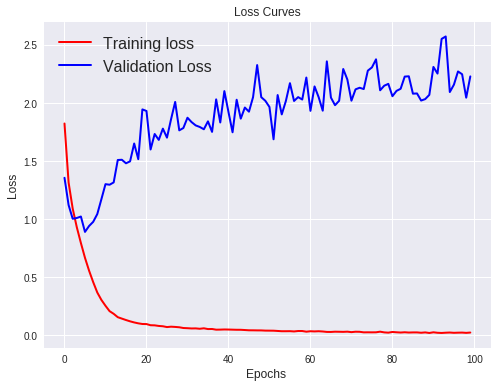

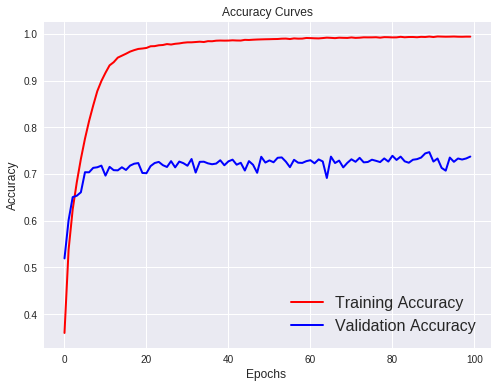

In [72]:
plot_performance(history)

The model didn't improve much. It still overfits train data. 

### Final improved model training
As a next step I reduced number of filters and added data augmentation.
Also I changed number of filters, batch size and strides for 1 Conv layer and placed max pooling after each 2 Conv layers. (tried different and saw which performed better).

In [57]:
def get_final_model():
    model = Sequential()

    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=train_images.shape[1:]))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

model = get_final_model()    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)          0         
__________

Here I use adam optimizer as I saw that It performs better comparing to rmsprop.

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=False)


datagen.fit(train_images)
    

In [51]:
epochs = 100
batch_size = 64

# save best weights 
filepath="weights_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# train network
history = model.fit_generator(datagen.flow(train_images, train_labels,
                                           batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(cv_images, cv_labels),
                              callbacks=callbacks_list)

Epoch 1/100
782/782 [==============================] - 47s 60ms/step - loss: 1.8754 - acc: 0.3181 - val_loss: 1.7184 - val_acc: 0.3758

Epoch 00001: val_acc improved from -inf to 0.37580, saving model to weights_2.best.hdf5
Epoch 2/100
123/782 [===>..........................] - ETA: 32s - loss: 1.5539 - acc: 0.4355782/782 [==============================] - 43s 55ms/step - loss: 1.4677 - acc: 0.4689 - val_loss: 1.3218 - val_acc: 0.5238

Epoch 00002: val_acc improved from 0.37580 to 0.52380, saving model to weights_2.best.hdf5
Epoch 3/100
224/782 [=======>......................] - ETA: 27s - loss: 1.3248 - acc: 0.5252782/782 [==============================] - 42s 53ms/step - loss: 1.2741 - acc: 0.5498 - val_loss: 1.0914 - val_acc: 0.6144

Epoch 00003: val_acc improved from 0.52380 to 0.61440, saving model to weights_2.best.hdf5
Epoch 4/100
265/782 [=========>....................] - ETA: 25s - loss: 1.1658 - acc: 0.5930782/782 [==============================] - 42s 53ms/step - loss: 1.146

356/782 [============>.................] - ETA: 21s - loss: 0.4875 - acc: 0.8373782/782 [==============================] - 42s 54ms/step - loss: 0.4865 - acc: 0.8377 - val_loss: 0.5330 - val_acc: 0.8227

Epoch 00030: val_acc did not improve
Epoch 31/100
360/782 [============>.................] - ETA: 21s - loss: 0.4743 - acc: 0.84782/782 [==============================] - 41s 52ms/step - loss: 0.4801 - acc: 0.8409 - val_loss: 0.6421 - val_acc: 0.7827

Epoch 00031: val_acc did not improve
Epoch 32/100
347/782 [============>.................] - ETA: 22s - loss: 0.4644 - acc: 0.8465782/782 [==============================] - 43s 55ms/step - loss: 0.4732 - acc: 0.8431 - val_loss: 0.6456 - val_acc: 0.7870

Epoch 00032: val_acc did not improve
Epoch 33/100
333/782 [===========>..................] - ETA: 22s - loss: 0.4746 - acc: 0.8426782/782 [==============================] - 43s 55ms/step - loss: 0.4678 - acc: 0.8437 - val_loss: 0.5377 - val_acc: 0.8192

Epoch 00033: val_acc did not improve

372/782 [=============>................] - ETA: 20s - loss: 0.3853 - acc: 0.8721782/782 [==============================] - 42s 54ms/step - loss: 0.3822 - acc: 0.8729 - val_loss: 0.4317 - val_acc: 0.8542

Epoch 00061: val_acc did not improve
Epoch 62/100
342/782 [============>.................] - ETA: 22s - loss: 0.3523 - acc: 0.8852782/782 [==============================] - 41s 53ms/step - loss: 0.3638 - acc: 0.8809 - val_loss: 0.5021 - val_acc: 0.8381

Epoch 00062: val_acc did not improve
Epoch 63/100
372/782 [=============>................] - ETA: 20s - loss: 0.3629 - acc: 0.8787782/782 [==============================] - 41s 53ms/step - loss: 0.3651 - acc: 0.8790 - val_loss: 0.4421 - val_acc: 0.8555

Epoch 00063: val_acc did not improve
Epoch 64/100
404/782 [==============>...............] - ETA: 18s - loss: 0.3611 - acc: 0.8804782/782 [==============================] - 42s 53ms/step - loss: 0.3660 - acc: 0.8789 - val_loss: 0.4053 - val_acc: 0.8648

Epoch 00064: val_acc did not impro

478/782 [=================>............] - ETA: 14s - loss: 0.3165 - acc: 0.8948782/782 [==============================] - 39s 50ms/step - loss: 0.3192 - acc: 0.8948 - val_loss: 0.4131 - val_acc: 0.8696

Epoch 00093: val_acc did not improve
Epoch 94/100
451/782 [================>.............] - ETA: 16s - loss: 0.3058 - acc: 0.8980782/782 [==============================] - 40s 51ms/step - loss: 0.3100 - acc: 0.8962 - val_loss: 0.4432 - val_acc: 0.8617

Epoch 00094: val_acc did not improve
Epoch 95/100
485/782 [=================>............] - ETA: 14s - loss: 0.3105 - acc: 0.8976782/782 [==============================] - 39s 50ms/step - loss: 0.3188 - acc: 0.8949 - val_loss: 0.3906 - val_acc: 0.8744

Epoch 00095: val_acc did not improve
Epoch 96/100
492/782 [=================>............] - ETA: 13s - loss: 0.3022 - acc: 0.8988782/782 [==============================] - 40s 51ms/step - loss: 0.3062 - acc: 0.8974 - val_loss: 0.3842 - val_acc: 0.8767

Epoch 00096: val_acc improved from

In [52]:
scores = model.evaluate(cv_images, cv_labels, verbose=1)
print("cross-validation set accuracy: {}%".format(scores[1]*100))
print("train set accuracy: %.2f%%" % max(history.history['acc']))

10000/10000 [==============================] - 2s 242us/step
cross-validation set accuracy: 86.8%
train set accuracy: 0.90%


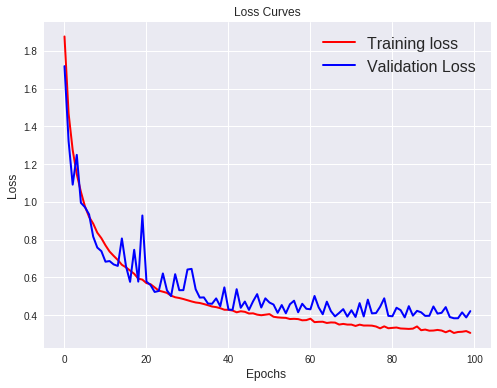

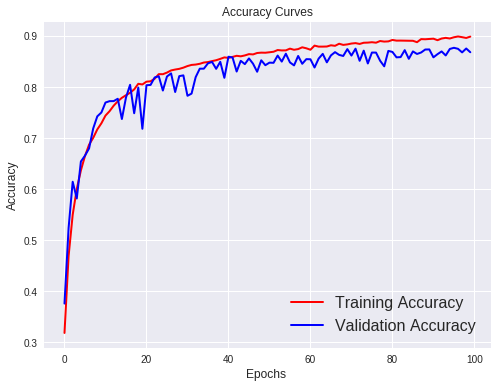

In [53]:
plot_performance(history)

### Final check-pointed model
Here I load already trained weights for final model.
You can download pretrained weights [here](https://drive.google.com/file/d/1jL90CP9ezJjqGAWzC-3Ku9ujeVv9hr_F/view?usp=sharing) and put the file **weights_2.best.hdf5** in the same directory as this notebook.

In [66]:
model = get_final_model()
model.load_weights("weights_2.best.hdf5")
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
scores = model.evaluate(cv_images, cv_labels, verbose=1)
print("cross-validation set accuracy: {}%".format(scores[1]*100))

10000/10000 [==============================] - 3s 316us/step
cross-validation set accuracy: 87.67%
